# Explore here

In [2]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')

df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


In [3]:
df.shape

(2999, 2)

In [4]:
df.duplicated().sum()

np.int64(630)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.reset_index()

,index,url,is_spam
0,0,https://briefingday.us8.list-manage.com/unsubs...,True
1,1,https://www.hvper.com/,True
2,2,https://briefingday.com/m/v4n3i4f3,True
3,3,https://briefingday.com/n/20200618/m#commentform,False
4,4,https://briefingday.com/fan,True
...,...,...,...
2364,2993,https://www.theverge.com/2020/6/29/21306889/di...,False
2365,2994,https://www.smartcitiesworld.net/news/news/dee...,False
2366,2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2367,2997,https://www.technologyreview.com/2019/12/20/13...,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2369 entries, 0 to 2998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   url      2369 non-null   object
 1   is_spam  2369 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 39.3+ KB


In [9]:
# Revisar el balance de las variables, cuantas son true y false
# Esta bastente desbalanceada

print(len(df[df['is_spam']==True]))
print(len(df[df['is_spam']==False]))

244
2125


In [10]:
import regex as re  

def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())

    return text.split()

print(preprocess_text(df.url[0]))





['https', 'briefingday', 'us', 'list', 'manage', 'com', 'unsubscribe']


Acá se eliminaron /,: y otros para que quede todo separado ' '

In [11]:
#df.url es lo mismo que df['url']

df.url = df.url.apply(preprocess_text)

df

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",True
1,"[https, www, hvper, com]",True
2,"[https, briefingday, com, v, i]",True
3,"[https, briefingday, com, m, commentform]",False
4,"[https, briefingday, com, fan]",True
...,...,...
2993,"[https, www, theverge, com, disney, deepfake, ...",False
2994,"[https, www, smartcitiesworld, net, news, news...",False
2996,"[https, techcrunch, com, an, optimistic, view,...",False
2997,"[https, www, technologyreview, com, this, star...",False


In [12]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

download('wordnet')
lemmatizer = WordNetLemmatizer()

download('stopwords')
stop_words = stopwords.words('english')
stop_words.append('http')

def lemmatize_text(words,lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word)>3]
    return tokens

df.url = df.url.apply(lemmatize_text)

df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felip\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,url,is_spam
0,"[briefingday, list, manage, unsubscribe]",True
1,[hvper],True
2,[briefingday],True
3,"[briefingday, commentform]",False
4,[briefingday],True
...,...,...
2993,"[theverge, disney, deepfake, face, swapping, r...",False
2994,"[smartcitiesworld, news, news, deepfake, techn...",False
2996,"[techcrunch, optimistic, view, deepfakes]",False
2997,"[technologyreview, startup, claim, deepfakes, ...",False


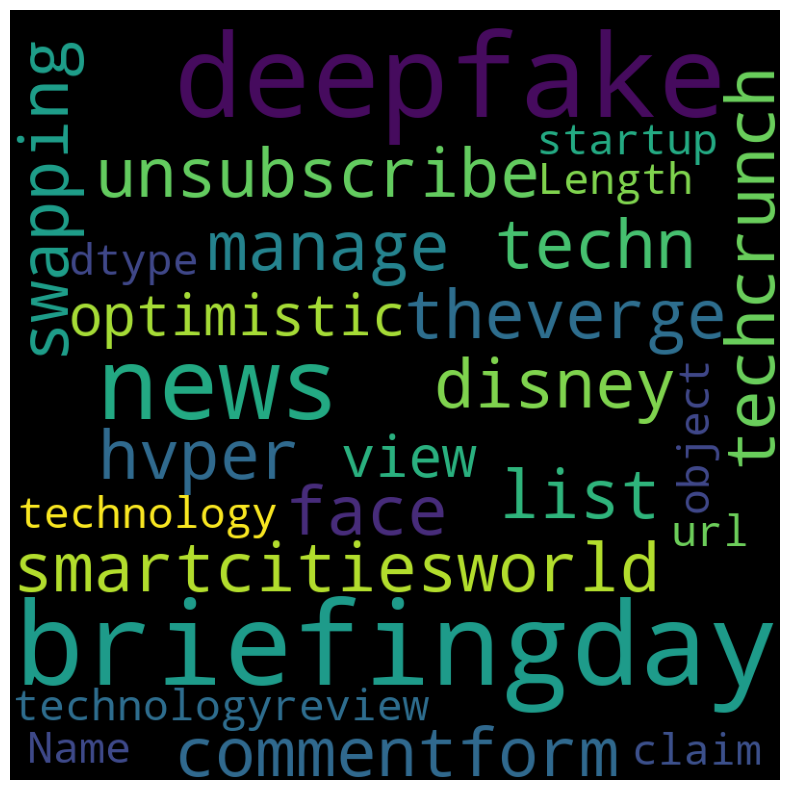

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(df.url))

fig = plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)

X = df.url
y = df.is_spam

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Se realiza una lista por compresión. Unir todas las palabras con un espacio.

tokens_list = [" ".join(tokens) for tokens in X_train]
tokens_list2 = [" ".join(tokens) for tokens in X_test]

# La matriz necesita calcular la importancia de cada palabra. Para eso necesita una lista de palabras separadas por espacios. Entonces 
# X_train y X_test transformarlos en las respectivas listas. 

X_train_vec = vectorizer.fit_transform(tokens_list).toarray()
X_test_vec = vectorizer.transform(tokens_list2).toarray()

X_train_vec


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1895, 418))